# CS308 Машин сургалт Лаборатори 5, 6, (7?)

# 1-р хэсэг
# Numpy ашиглан питон дахь мэдрэлийн сүлжээг эхнээс кодчилох онол болон практик.
1. Өгөгдлийн багц түүний дүрслэл сургалтанд бэлтгэх
2. Энгийн мэдрэлийн сүлжээ үүсгэх шууд урсгал
3. Градиент тооцоолох гэдрэг урсгал
4. Сургалтыг хэрэгжүүлэх
5. Сургасан загварт дүн шинжилгээ хийх туслах параметрүүдийг тохируулах


Бид хиймэл мэдрэлийн сүлжээ гэж юу болохыг мэддэг бөгөөд 'урагшаа болон арагшаа тархах' талаар практик мэдлэгтэй болох болно. Зүгээр энгийн загвар дээр сургалтыг хэрэгжүүлэх болно.

> Дараах бичлэгээс илүү ихийг мэдэх боломжтой юм. [youtube playlist](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) by [3Blue1Brown](https://www.3blue1brown.com/).

> youtube: https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

## Ашиглах сангууд:

In [ ]:
import numpy as np
import gzip
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from time import time

In [ ]:
#hide_input
import warnings
np.random.seed(123)
%matplotlib inline
warnings.filterwarnings("ignore")

## Өгөгдлийг бэлтгэх

Энэхүү практик дадлагад бид компьютерийн хараанд хамгийн түгээмэл  датасетуудын нэгийг ашиглах болно, [MNIST](https://en.wikipedia.org/wiki/MNIST_database). MNIST нь Стандартчилал, Технологийн Үндэсний Институтээс цуглуулж, Ян Лекун болон түүний хамтран зүтгэгчдийн машин судлах мэдээллийн сан болгон цуглуулсан гараар бичсэн тоонуудын зургийг агуулдаг. Lecun нь 1998 онд [Lenet-5](http://yann.lecun.com/exdb/lenet/)-д MNIST-ийг ашигласан бөгөөд гараар бичсэн тоон дарааллыг бодитоор хүлээн зөвшөөрч байгааг харуулсан анхны компьютерийн систем юм. Энэ бол АИ-ийн түүхэн дэх хамгийн чухал ололт амжилтуудын нэг байлаа.

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical


dataset = mnist.load_data('mnist.db')

train,test = dataset

x_train, y_train = train
y_train = to_categorical(y_train)
x_train = x_train.reshape(-1, 28*28)/255

x_test, y_test = test
y_test = to_categorical(y_test)
x_test = x_test.reshape(-1, 28*28)/255




print("Shape of x_train:",x_train.shape)
print("Shape of y_train:",y_train.shape)

print("Shape of x_test:",x_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (60000, 784)
Shape of y_train: (60000, 10)
Shape of x_test: (10000, 784)
Shape of y_test: (10000, 10)


**Бидэнд яагаад сургалт болон баталгаажуулалтын гэсэн өөр өөр багц хэрэгтэй вэ ?**

Дээрх видео бичлэгээс илүү ихийг мэдэж авч болно:

> youtube: https://youtu.be/1waHlpKiNyY?t=243

Өгөгдлийн сангаа харцгаая

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

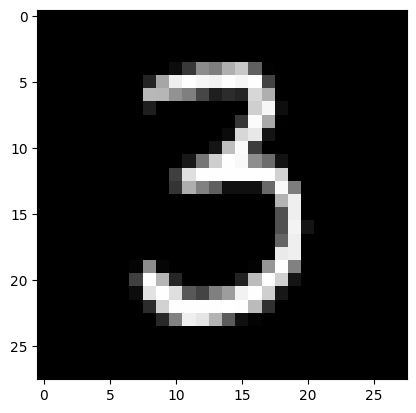

In [ ]:
#collapse
plt.imshow(x_train[50].reshape(28,28), cmap="gray");
x_train[50]

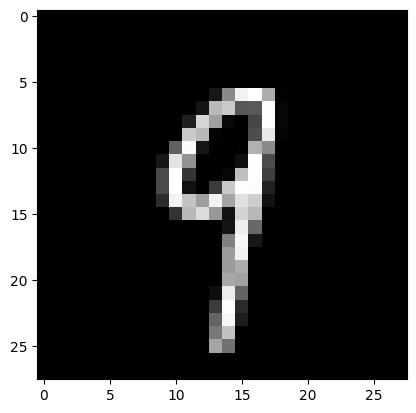

In [ ]:
#collapse
plt.imshow(x_train[900].reshape(28,28), cmap="gray");

## Энгийн загварын архитектур

Энэ даалгаврын хувьд бид энэ 2 шугаман давхарга, 10 нэгж бүхий гаралтын давхаргыг маш энгийн загварын архитектурыг ашиглах болно.

In [ ]:
#hide_input
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"' + s + '; }')

## Энэ сүлжээ гэдэг нь юу гэсэн үг болохыг илүү дэлгэрэнгүй авч үзье:

Энэ сүлжээний бүх бүрэлдэхүүн хэсгүүдийг авч үзье:
- **Linear:**
  Шугаман давхарга нь дараах тооцооллыг хийнэ:      
   ```
   out = matmul(input,W1) + B1
   ```
   
- **ReLU:**
  ReLU нь дараах тооцооллыг хийнэ:
  ```
  out = max(0, input)
  ```
- **Sigmoid:**
  Sigmoid нь дараах тооцооллыг хийнэ:
  ```
  out = 1/(1 + e.pow(input))
  ```
  
- **Loss:**
  Бид алдагдалд дараах тэгшитгэлээр тодорхойлогдсон CrossEntropy алдагдлыг ашиглах болно:
  $$loss= -\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(yhat^{(i)}\right) + (1-y^{(i)})\log\left(1-yhat^{(i)}\right)) $$

**Одоо бид өөрсдийн загвар архитектуртай болсноор загварыг цуглуулахад шаардлагатай хэсгүүдийг бүтээцгээе:**
- linear layer
- relu activation
- sigmoid activation
- loss

**Эхлээд загварынхаа арагшаа, урагшаа дамжаанд юу болж байгааг ойлгохыг хичээе:**

**Судалгааны ажилын дагуу бидний загвар дараах байдалтай байна:**

> Тэмдэглэгээ: `@` python-д  `matrix-multiplication operator`.

```python
inputs = x_train # оролтууд
targets = y_train # шошго

# 1-р шугаман давхаргад урагш тархалт
z1 = inputs @ w2 + b2
a1 = relu(z1)
# 2-р шугаман давхаргад урагш тархалт
z2 = a1 @ w2 + b2
a2 = relu(z2)
# гаралт шугаман давхаргад урагш тархалт
z3 = a2 @ w3 + b3
pred = a3 = sigmoid(z3) # эдгээр нь бидний загварын таамаглалууд
# шошго болон таамаглалуудаас алдааг тодорхойлох
loss = loss_fn(a3, targets)
```
> Жич: Энэ бол бодит код биш зөвхөн ойлголтын psuedo-код юм.

**Урагш буюу шууд тархалт :**

In [ ]:
#hide_input
gv('''
X->linear1->relu1->linear2->relu2->linear3->sigmoid->prediction

W1->linear1
B1->linear1

W2->linear2
B2->linear2

W3->linear3
B3->linear3
''')

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
#hide_input
gv('''
prediction->loss_fn
target->loss_fn
loss_fn-> loss
''')

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

**Мөн буцах буюу гэдрэг тархалт нь дараах байдалтай байна : (Гинжэн дүрэм)**

(Let us assume that the `grad(inp, out)` computes the gradients of `inp` wrt `out`)
(`grad(inp, out)` нь `inp`, `out` гэх мэтийн градиентуудыг тооцоолдог гэж бодъё)

```python
# сүүлийн идэвхжүүлэх давхаргын гаралтын алдагдлын gradient: (a3)
# (өөрөөр загварын таамаглалтууд)
da3 = grad(loss, a3)

# одоогийн шугаман давхаргын гаралт руу алдагдлын gradient: (z3)
dz3 = grad(loss, z3) = grad(loss, a3) * grad(a3, z3)
# алдагдлын градиент w3 хүртэл
dw3 = grad(loss, w3) = grad(loss, z3) * grad(z3, w3) = dz3 * grad(z3, w3)
# алдагдлын градиент b3 хүртэл
db3 = grad(loss, b3) = grad(loss, z3) * grad(z3, b3) = dz3 * grad(z3, b3)
# одоогийн шугаман давхаргын оролт руу алдагдлын gradient: (a2)
da2 = grad(loss, a2) = grad(loss, a3) = grad(a2, )

# одоогийн шугаман давхаргын гаралт руу алдагдлын gradient: (z2)
dz2 = grad(loss, z2) = grad(loss, a2) * grad(a2, z2)
# алдагдлын градиент w2 хүртэл
dw2 = grad(loss, w2) = grad(loss, z2) * grad(z2, w2) = dz2 * grad(z2, w2)
# алдагдлын градиент b2 хүртэл
db2 = grad(loss, b2) = grad(loss, z2) * grad(z2, b2) = dz2 * grad(z2, b2)
# одоогийн шугаман давхаргын оролт руу алдагдлын gradient: (a1)
da1 = grad(loss, a1) = grad(loss, z2) * grad(z2, a1) = dz2 * grad(z2, a1)

# одоогийн шугаман давхаргын гаралт руу алдагдлын gradient: (z1)
dz1 = grad(loss, z1) = grad(loss, a1) * grad(a1, z1) = da1 * grad(a1, z1)
# алдагдлын градиент w1 хүртэл
dw1 = grad(loss, w1) = grad(loss, z1) * grad(z1, w1) = dz1 * grad(z1, w1)
# алдагдлын градиент b1 хүртэл
db1 = grad(loss, b1) = grad(loss, z1) * grad(z1, 1) = dz1 * grad(z1, b1)
# Энэ давхаргад оролтууд нь бид илүү олон градиентыг тооцоолол хийх шаардлагагүй тулд бидний өөрчилж чадахгүй сургалтын жишээнүүд юм.

# parameter-үүдийг шинэчлэх :
# одоо бидэнд шаардлагатай бүх градиент байгаа болохоор бид одоо шинэчлэх алхмыг хийж болно.
w1 -= learning_rate * dw1
b1 -= learning_rate * db1

w2 -= learning_rate * dw2
b2 -= learning_rate * db2
```
> Жич: Энэ бол бодит код биш зөвхөн ойлголтын psuedo-код юм.

**Буцах чиглэл:**

In [ ]:
#hide_input
gv('''
Loss -> sigmoid->linear3
linear3->W3
linear3->B3
linear3->relu2->linear2

linear2->W2
linear2->B2
linear2->relu1->linear1

linear1->W1
linear1->B1
''')

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

### `Linear` давхарга

Доорх код нь бидний мэдрэлийн сүлжээнд `Linear` давхаргыг төлөөлдөг `Linear class` үүсгэдэг. Ангийн `forward function` нь `layer's forward propagation` -ийг хэрэгжүүлдэг & `backward function` нь `layers's backward propagation` хэрэгжүүлдэг. Код гэж юу болохыг нарийвчлан авч үзье:

- **Forward:**  
Энэ хэсэг нь шууд шулуунаар нь **`input`**  болон **`weights`**-ын хооронд dot-product-г тооцоолдог . **`z`** болон **`bias`** нэр томъёог нэмдэг. Мөн backward чиглэлд ашиглахын тулд бий болсон утгуудыг бүгдийг нь хадгалдаг.

- **Backward:**
    * Ангийн **`Linear`**-ын буцаах арга нь **`grads`** гэсэн аргументад ордог.
    * **`grads`** гэдэг нь одоогийн шугаман давхаргийн гаралт руу гарах алдагдлын градиент юм. **`dz`** хэрэв бид псевдо-кодоо дагаж гүйцэтгэх болно.
    * Шугаман давхаргадаа арагшаа тооцоолохын тулд бидэнд дараах зүйл хэрэгтэй:
        - **`grad(z, w)`**
        - **`grad(z, b)`**
        - **`grad(z, a_prev)`**


> Тэмдэглэл: `z`, `w`, `b`, `a_prev` гэдэг нь Linear давхаргын гаралт, жин, bias болон оролт-идэвхжүүлэлтийг тус тус хэлдэг.

In [ ]:
class Linear:
    def __init__(self, w, b):
        self.w = w
        self.b = b

    def forward(self, inp):
        """
        Давхаргын урагшлах тархалтын шугаман хэсгийг хэрэгжүүлнэ.
        аргумент:
        inp : өмнөх давхаргын идэвхжүүлэлт (эсвэл оролтын өгөгдөл)
        Буцаах нь:
        z : идэвхжүүлэх функцийн оролт, мөн урьдчилан идэвхжүүлэх параметр гэж нэрлэдэг
        """
        self.inp = inp
        self.z  = np.dot(self.inp, self.w.T) + self.b
        return self.z

    def backward(self, grads):
        """
        Нэг давхаргад арагшаа тархалтын шугаман хэсгийг хэрэгжүүлнэ.
        аргумент:
        grads : шугаман гаралттай холбоотой зардлын Грэйдиент.
        эсвэл prev давхаргаас хуримтлагдсан градиентууд.
        Энэ нь гинжний дүрэмд градиентуудыг тооцоолоход ашиглагддаг.
        Буцаах нь:
        да: өмнөх давхаргын идэвхжүүлэлт эсвэл оролт руу зардлын одоогийн давхаргын Gradient        .
        dw: W-тэй холбоотой зардлын градиент
        db : b-тэй холбоотой зардлын градиент
        """
        m = self.inp.shape[0]
        # жингүүдийн алдагдлын градиент
        dw = np.dot(self.z.T, grads) / m
        # bias-уудын алдагдлын градиент
        db = np.sum(grads, axis=0, keepdims=True)
        # алдагдлын шугаман давхаргын оролтод энэ нь гинжний дүрмийг үргэлжлүүлэхэд хэрэглэгддэг
        da_prev = np.dot(grads, self.w.T)
        return (da_prev, dw, db)

### `ReLU` давхарга

- **Forward**:  
ReLU-ийн математик томъёо нь $A = RELU(Z) = max(0, Z)$
- **Backward**:  
Буцах дамжлагын үед relu нь `loss activation` буюу `da` гэсэн градиентуудыг хүлээн зөвшөөрч дараа нь `loss input-of-relu(z)` i.e, `dz` гэж тооцоолоно.

In [ ]:
class RelU:
    def forward(self, inp):
        """
        RELU функцийг хэрэгжүүлэлт.

        аргумент:
            inp : Шугаман давхаргын гаралт, ямар ч хэлбэрт

        Буцаах:
            a  : Идэвхжүүлэлтийн дараах параметр, Z-тэй ижил хэлбэртэй
        """
        self.inp = inp
        self.output = np.maximum(0, self.inp)
        return self.output

    def backward(self, grads):
        """
        Нэг RELU нэгжийг буцах тархалтыг хэрэгжүүлнэ.

        аргумент:
            grads : алдагдлын градиентууд идэвхжүүлэлтийн гаралт руу

        Буцаах:
            dz : Идэвхжүүлэлтийн оролттой холбоотой алдагдлын градиент
        """
        dz = np.array(grads, copy=True)
        dz[self.inp <= 0] = 0
        return dz

### `sigmoid` давхарга

Sigmoid давхарга нь `ReLU` давхаргатай яг ижил байдлаар үйл ажиллагаа хийгддэг ба ялгаа нь урагш дамжуулах гаралтын тооцоо юм.

`sigmoid layer`-д: $\sigma(Z) = \frac{1}{ 1 + e^{-(W A + b)}}$

In [ ]:
class Sigmoid:
    def forward(self, inp):
        """
        sigmoid идэвхжүүлэлтийг хэрэгжүүлнэ

        аргумент:
            inp: Шугаман давхаргын гаралт, ямар ч хэлбэрт

        Буцаах:
            a  : sigmoid(z), inp-тэй адил хэлбэрийг гаргах
        """
        self.inp = inp
        self.out =  1 / (1 + np.exp(-self.inp))
        return self.out

    def backward(self, grads):
        """
        Нэг сигмоид нэгжийг буцах чиглэлийн үржүүлэгийг хэрэгжүүлнэ.

        аргумент:
            grads : алдагдлын градиентууд идэвхжүүлэлтийн гаралт руу

        Буцаах:
            dz : Идэвхжүүлэлтийн оролттой холбоотой алдагдлын градиент
        """
        s = self.out
        dz = grads * s * (1 - s)
        return dz

## `Loss` функц :

Энэ даалгаварт бид [CrossEntropy Loss](https://en.wikipedia.org/wiki/Cross_entropy)-ийг ашиглана.


CrossEntropy Loss-ийн `forward` дамжуулалтыг дараах байдлаар тооцоолжээ.

$$loss= -\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(yhat^{(i)}\right) + (1-y^{(i)})\log\left(1-yhat^{(i)}\right)) $$

CrossEntropy Loss-ийн `backward` дамжуулалтыг дараах байдлаар тооцоолжээ.
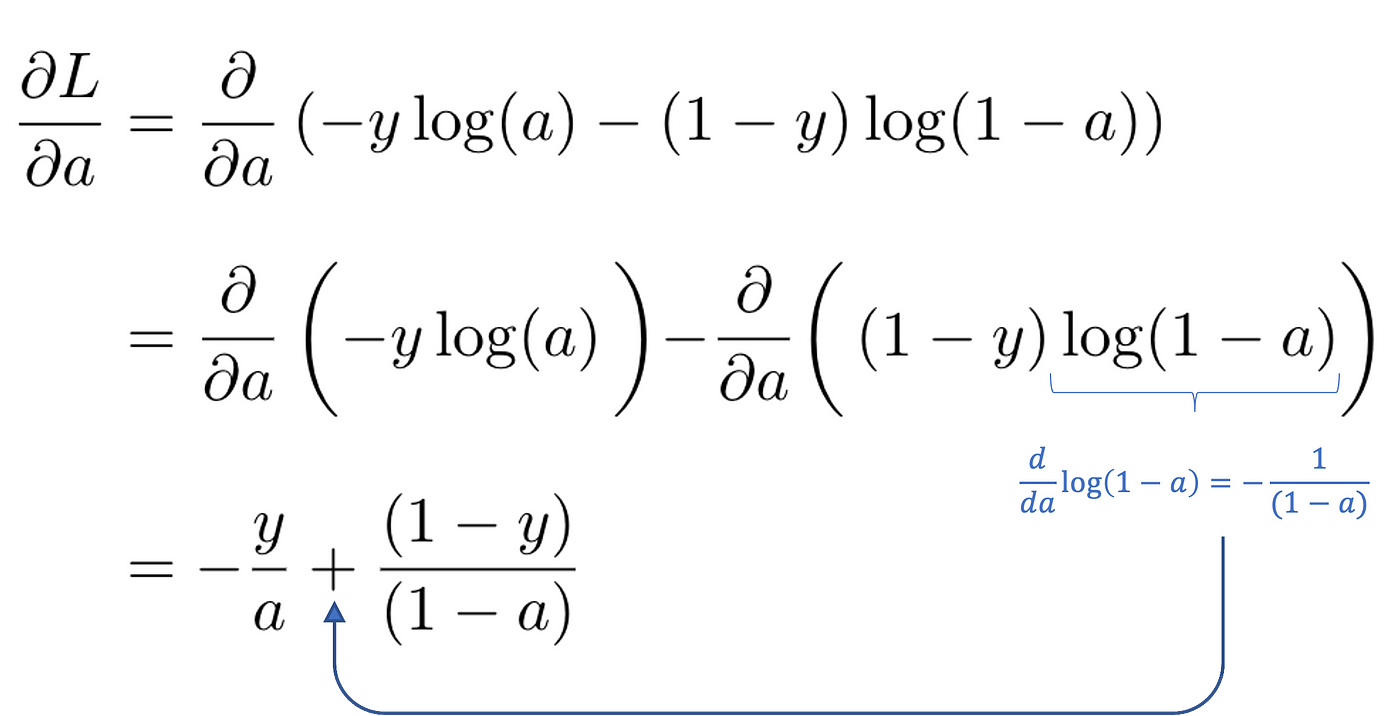

In [ ]:
class CELoss():
    def forward(self, pred, target):
        """
        CrossEntropy алдагдлын функцийг хэрэгжүүлнэ.

        аргумент:
            pred   : мэдрэлийн сүлжээнээс урьдчилан таамагласан шошгуудыг
            target : үнэн шошго
        Буцаах:
            loss   : cross-entropy loss
        """
        self.yhat = np.clip(pred, 1e-12, 1 - 1e-12)
        self.y = target
        m = self.y.shape[0]
        # алдагдлыг тооцоолох
        term1 = self.y * np.log(self.yhat)
        term2 = (1 - self.y) * np.log(1 - self.yhat)
        loss = np.sum(term1 + term2) /(-m)
        self.output = loss
        return np.squeeze(self.output) # array-г нэг утганд хөрвүүлэх

    def backward(self):
        """
        loss_fn -ийн градинетуудыг урьдчилан таамагласан шошго руу тооцоолдог

        Буцаах:
         da : урьдчилан таамагласан шошгуудын уламжлал
        """
        # [урьдчилан таамагласан шошготой] холбоотой loss_fn уламжлал
        da = -(self.y / self.yhat) + (1 - self.y)/(1 - self.yhat)
        return da

## Загвар:

**Одоо ашиглах гэж байгаа мэдрэлийн сүлжээний архитектурыг хэрэгжүүлцгээе:**

- Манай загвар нь 2 далд давхарга, гаралтын давхаргатай болно.
- 2 `hidden layers` `(linear layers)` нь тус бүрдээ `16 units` дараа нь `ReLU` идэвхжүүлэх давхарга, `output layer` `(linear layers)` нь `10 unit` дараа нь `Sigmoid` давхаргуудтай болно.

Загварыг бүтээхэд шаардагдах давхаргуудыг цуглуулъя:

Shape of Inputs: (60000, 784)
Shape of Targets: (60000, 10)


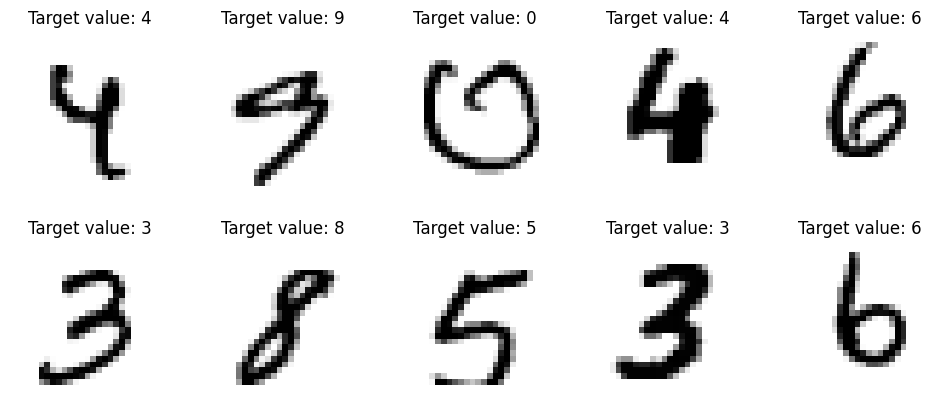

In [ ]:
#collapse
print("Shape of Inputs:", x_train.shape)
print("Shape of Targets:", y_train.shape)

fig = plt.figure(figsize=(12,5))
for i in range(10):
    n = np.random.randint(len(x_train))
    val = x_train[n]
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(val.reshape(28,28), cmap="binary")
    plt.title(f"Target value: {np.argmax(y_train[n])}")
    plt.axis("off")

**Initialize model parameters:**

In [ ]:
#hide_output

nh1 = 16 # эхний нуугдмал давхарга дахь нэгжүүд
nh2 = 16 # 2-р нуугдмал давхарга дахь нэгжүүд
nh3 = 10 # гаралтын давхарга дахь нэгжүүдийн

w1  = np.random.randn(x_train.shape[1], nh1) * 0.01
b1  = np.zeros((1, nh1))

w2  = np.random.randn(nh1, nh2) * 0.01
b2  = np.zeros((1, nh2))

w3  = np.random.randn(nh2, nh3)
b3  = np.zeros((1, nh3))

w1.shape, b1.shape, w2.shape, b2.shape, w3.shape, b3.shape

((784, 16), (1, 16), (16, 16), (1, 16), (16, 10), (1, 10))

**Манай загварыг бүтээхэд шаардлагатай давхаргуудыг давхарлая :**

In [ ]:
lin1    = Linear(w1,b1) # 1 hidden layer
relu1   = RelU()
lin2    = Linear(w2,b2) # 2nd hidden layer
relu2   = RelU()
lin3    = Linear(w3,b3) # output layer
sigmoid = Sigmoid()

loss_fn = CELoss() # loss_fn

### Шууд чиглэл:

In [ ]:
# forward pass
z1   = lin1.forward(x_train[:50])
a1   = relu1.forward(z1)
z2   = lin2.forward(a1)
a2   = relu2.forward(z2)
z3   = lin3.forward(a2)
pred = a3 = sigmoid.forward(z3)
# print(pred)
# calculate loss
loss = loss_fn.forward(pred, y_train[:50])
print("Loss:", loss)

ValueError: shapes (16,784) and (16,784) not aligned: 784 (dim 1) != 16 (dim 0)

### Буцах чиглэл:

In [ ]:
# backward pass
da3 = loss_fn.backward() # gradient of loss wrt to final output

dz3 = sigmoid.backward(da3)

da2, dw3, db3 = lin3.backward(dz3)

dz2 = relu2.backward(da2)
da1, dw2, db2 = lin2.backward(dz2)

dz1 = relu1.backward(da1)
_, dw1, db1 = lin1.backward(da1)

# параметрүүд болон градиентууд ижил хэлбэртэй эсэхийг шалгах.
# Ингэснээр бид шинэчлэлтийн байдлыг урьдчилан харж чадна
assert lin1.w.shape == dw1.shape
assert lin2.w.shape == dw2.shape
assert lin3.w.shape == dw3.shape

assert lin1.b.shape == db1.shape
assert lin2.b.shape == db2.shape
assert lin3.b.shape == db3.shape

AssertionError: 

### parameter-үүдийг шинэчлэх:

In [ ]:
# сургах хурдыг тохируулах
learning_rate = 0.0002


lin1.w -= learning_rate * dw1
lin2.w -= learning_rate * dw2
lin3.w -= learning_rate * dw3

lin1.b -= learning_rate * db1
lin2.b -= learning_rate * db2
lin3.b -= learning_rate * db3

Тэгэхээр, бидний загварыг сургахад эхлээд `forward pass`-ийн үед загварын `loss`-ыг тооцоолж, дараа нь загварын `parameters` руу `loss`-ийн градиентуудыг тооцоолдог. Үүний дараа эдгээр `gradients` нь `update the model parameters` ашиглагддаг. Бид энэхүү ажлын урсгалыг тодорхой тооны `iterations` эсвэл бидний `loss` хүссэн утганд хүрэх хүртэл үргэлжлүүлсээр байдаг.


Энэ алхмуудыг хэрэгжүүлцгээе.

### Бүгдийг нэгтгэвэл:

- **parameter-үүдийг эхлүүлэх:**

In [ ]:
#hide_output

nh1 = 256 # эхний нуугдмал давхарга дахь нэгжүүдийн
nh2 = 64 # 2-р нуугдмал давхарга дахь нэгжүүдийн
nh3 = 10 # гаралтын давхарга дахь нэгжүүдийн

w1  = np.random.randn(x_train.shape[1], nh1) * 0.01
b1  = np.zeros((1, nh1))

w2  = np.random.randn(nh1, nh2) * 0.01
b2  = np.zeros((1, nh2))

w3  = np.random.randn(nh2, nh3)
b3  = np.zeros((1, nh3))

w1.shape, b1.shape, w2.shape, b2.shape, w3.shape, b3.shape

((784, 256), (1, 256), (256, 64), (1, 64), (64, 10), (1, 10))

Загварт зориулж 'Model' class бий болгох.

Энэ `Model` class нь манай мэдрэлийн сүлжээний бүх параметрүүдийг хадгалах болно. `forward` арга нь тухайн загварын `loss` (болон `predictions`) үүсгэхийн тулд сүлжээний `forward pass`-ийг тооцоолно. `backward` арга нь `loss`-ийн градинетуудыг загварын `parameters` хүргэхийн тулд сүлжээний `backward pass` тооцоолно. Эцэст нь `update` арга нь загварын параметрүүдийг шинэчлэх болно.

In [ ]:
class Model:
    def __init__(self, learning_rate):
        """
        энгийн нерон сүлжээ
        `forward` загварын шууд тархалтыг тооцоолно
        `backward` загварын буцах тархалтыг тооцоолно
        `update_step` загварын парамертрүүдийг шинэчлэнэ
        """
        self.lin1    = Linear(w1,b1) # 1-р шугаман давхарга
        self.relu1   = RelU()        # 1-р идэвхжүүлэх давхарга

        self.lin2    = Linear(w2,b2) # 2-р шугаман давхарга
        self.relu2   = RelU()        # 2-р идэвхжүүлэх давхарга

        self.lin3    = Linear(w3,b3) # 3-р шугаман давхарга
        self.sigmoid = Sigmoid()     # 3-р идэвхжүүлэх давхарга

        self.loss_fn = CELoss()      # loss_fn

        # сургалтын хурд
        self.lr      = learning_rate
        # алдааг алхам бүрт хадгална
        self.losses  = []


    def forward(self, inp, calc_loss=True, targ=None):
        """
        Загварыг урагшлах алхмыг тооцоол. Нэмэлтээр энэ нь мөн алдагдлыг болон загварын урьдчилан таамаглалыг буцааж өгдөг.

        аргумент:
            inp       : сургалтын сан.
            calc_loss : зөвхөн урьдчилан таамаглал тооцоолдог бол загварын алдагдлыг тооцохгүй байх
            targ      : шошгууд.

        Тайлбар: ''алдагдал''-ыг тооцохын тулд 'шошго' заавал өгөх ёстой

        Буцаах:
            pred : 3-р идэвхжүүлэлтийн давхаргын үр дүн.
            loss : загвараа алдах , хэрэв 'шошго' өгөгдсөн бол.
        """
        out  = (self.relu1.forward(self.lin1.forward(inp)))
        out  = (self.relu2.forward(self.lin2.forward(out)))
        pred = (self.sigmoid.forward(self.lin3.forward(out)))

        if calc_loss:
            assert targ is not None, "алдагдлыг тооцохын тулд заавал өгөх ёстой"
            loss = self.loss_fn.forward(pred, targ)

            self.losses.append(loss)
            return loss, pred
        else:
            return pred

    def _assert_shapes(self, dw1, dw2, dw3, db1, db2, db3):
        """
        Загварын параметрүүдийн хэлбэр, градиентуудыг шалгана
        """
        assert self.lin1.w.shape == dw1.shape
        assert self.lin2.w.shape == dw2.shape
        assert self.lin3.w.shape == dw3.shape

        assert self.lin1.b.shape == db1.shape
        assert self.lin2.b.shape == db2.shape
        assert self.lin3.b.shape == db3.shape


    def backward(self):
        """
        Буцах алхмыг тооцоолж, параметрүүдийн градиентуудыг алдагдалтай буцааж өгдөг
        """
        da3 = self.loss_fn.backward()

        dz3 = self.sigmoid.backward(da3)
        da2, dw3, db3 = self.lin3.backward(dz3)

        dz2 = self.relu2.backward(da2)
        da1, dw2, db2 = self.lin2.backward(dz2)

        dz1 = self.relu1.backward(da1)
        _, dw1, db1 = self.lin1.backward(dz1)

        self._assert_shapes(dw1, dw2, dw3, db1, db2, db3)

        self.dws = [dw1, dw2, dw3]
        self.dbs = [db1, db2, db3]


    def update(self):
        """
        Шинэчлэх алхмыг гүйцэтгэнэ
        """
        self.lin1.w -= self.lr * self.dws[0]
        self.lin2.w -= self.lr * self.dws[1]
        self.lin3.w -= self.lr * self.dws[2]

        self.lin1.b -= self.lr * self.dbs[0]
        self.lin2.b -= self.lr * self.dbs[1]
        self.lin3.b -= self.lr * self.dbs[2]

In [ ]:
nn.lin1.w.shape

(784, 256)

In [ ]:
nn.dws[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
nn = Model(learning_rate=0.0005)
epochs = 20 # сургалтын өгөгдлийн харах тоо

for n in range(epochs):
    loss, _ = nn.forward(x_train, calc_loss=True, targ=y_train)
    nn.backward()
    nn.update()
    print(f"Loss after interation {n} is {loss:.4f}")

AssertionError: 

Text(0, 0.5, 'Loss')

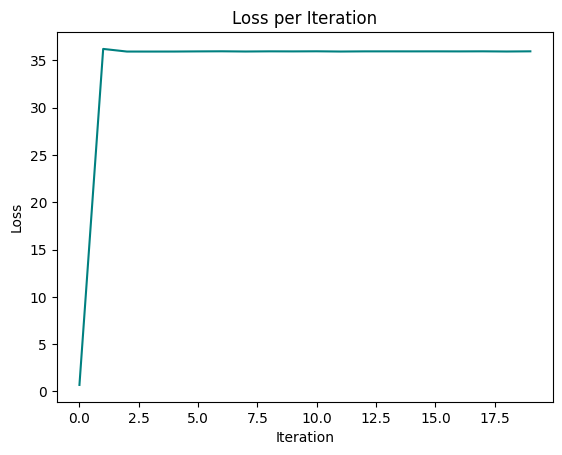

In [ ]:
#collapse
plt.plot(nn.losses, color="teal")
plt.title("Loss per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Loss")

## Загварын үнэн зөвийг тооцоолох

**'Баталгаажуулах' датасет дээр ''үнэн зөв''-ийг тооцоолон загвар үзүүлэлтээ шалгая**

Сургалтын багц дээрх үнэн зөв

In [ ]:
preds = nn.forward(x_train, calc_loss=False) # загвараас таамаглалуудыг үүсгэх
# accuracy тооцоолох
print(preds.shape, y_train.shape)
preds=np.argmax(preds, axis=1)
y_train=np.argmax(y_train, axis=1)
print(preds.shape, y_train.shape)

acc = np.sum(preds==y_train)/len(y_train)
print(acc)

(60000, 10) (60000, 10)
(60000,) (60000,)
0.11236666666666667


In [ ]:
print(preds[0], y_train[0])

1 5


Баталгаажуулах багц дээрх үнэн зөв

In [ ]:
preds = nn.forward(x_test, calc_loss=False) # загвараас таамаглалуудыг үүсгэх
# accuracy тооцоолох
preds=np.argmax(preds, axis=1)
y_test=np.argmax(y_test, axis=1)
acc = np.sum(preds==y_test)/len(y_test)
print(acc)

0.1135


> Тэмдэглэл: Манай загвар 'сургалтын' болон 'баталгаажуулах' багц дээр **'0.60'**-ийн 'үнэн зөв' хүрсэн!

## Загвараас таамаглалуудыг үүсгэх

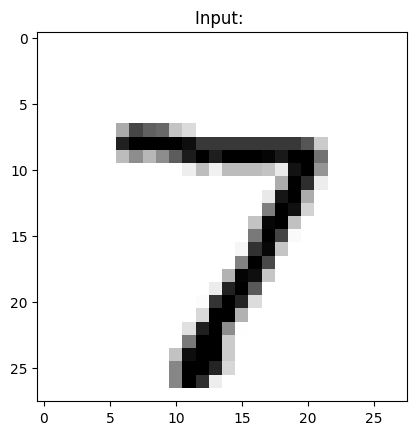

Predicted output: 7


In [ ]:
#collapse
test_inp = x_test[0] # баталгаажуулах багцаас нэгийг сонгон шалгая
plt.title("Input: ")

plt.imshow(test_inp.reshape(28,28), cmap="binary")
plt.show()

pred = nn.forward(test_inp, calc_loss=False)
predicted_val = np.argmax(pred)
print(f"Predicted output: {predicted_val}")

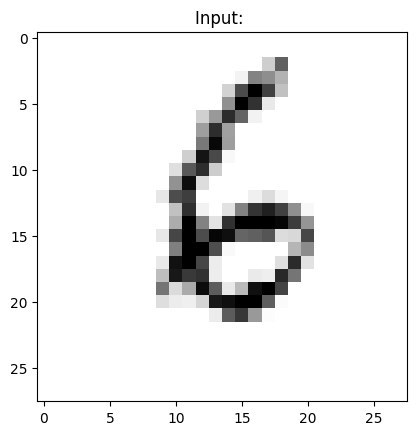

Predicted output: 0


In [ ]:
#collapse
test_inp = x_test[2000] # баталгаажуулах багцаас нэгийг сонгон шалгая
plt.title("Input: ")
plt.imshow(test_inp.reshape(28,28), cmap="binary")
plt.show()

pred = nn.forward(test_inp, calc_loss=False)
predicted_val = np.argmax(pred)
print(f"Predicted output: {predicted_val}")

# 2-р хэсэг
# CuPy ашиглан питон дахь мэдрэлийн сүлжээг эхнээс кодчилох онол болон практик.



In [ ]:
import cupy as cp
from keras.datasets import mnist
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28 * 28).astype(cp.float32) / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype(cp.float32) / 255.0
y_train = to_categorical(y_train).astype(cp.float32)
y_test = to_categorical(y_test).astype(cp.float32)

In [ ]:
class Linear:
    def __init__(self, w, b):
        self.w = w
        self.b = b

    def forward(self, inp):
        self.inp = inp
        self.z = cp.dot(self.inp, self.w) + self.b
        return self.z

    def backward(self, grads):
        m = self.inp.shape[0]
        dw = cp.dot(self.inp.T, grads) / m
        db = cp.sum(grads, axis=0, keepdims=True) / m
        da_prev = cp.dot(grads, self.w.T)
        return (da_prev, dw, db)

In [ ]:
class RelU:
    def forward(self, inp):
        self.inp = inp
        self.output = cp.maximum(0, self.inp)
        return self.output

    def backward(self, grads):
        dz = cp.array(grads, copy=True)
        dz[self.inp <= 0] = 0
        return dz

In [ ]:
class Softmax:
    def forward(self, inp):
        exp_values = cp.exp(inp - cp.max(inp, axis=1, keepdims=True))
        self.out = exp_values / cp.sum(exp_values, axis=1, keepdims=True)
        return self.out

    def backward(self, grads):
        return grads

In [ ]:
class CELoss():
    def forward(self, pred, target):
        self.yhat = cp.clip(pred, 1e-12, 1 - 1e-12)
        self.y = target
        m = self.y.shape[0]
        term1 = self.y * cp.log(self.yhat)
        term2 = (1 - self.y) * cp.log(1 - self.yhat)
        loss = cp.sum(term1 + term2) /(-m)
        self.output = loss
        return cp.squeeze(self.output)

    def backward(self):
        da = (self.yhat - self.y) / (self.yhat * (1 - self.yhat))
        return da

In [ ]:
nh1 = 256
nh2 = 64
nh3 = 10
w1 = cp.random.randn(x_train.shape[1], nh1) * 0.01
b1 = cp.zeros((1, nh1))
w2 = cp.random.randn(nh1, nh2) * 0.01
b2 = cp.zeros((1, nh2))
w3 = cp.random.randn(nh2, nh3) * 0.01
b3 = cp.zeros((1, nh3))

In [ ]:
class Model:
    def __init__(self, learning_rate):
        self.lin1 = Linear(w1, b1)
        self.relu1 = RelU()
        self.lin2 = Linear(w2, b2)
        self.relu2 = RelU()
        self.lin3 = Linear(w3, b3)
        self.softmax = Softmax()
        self.loss_fn = CELoss()
        self.lr = learning_rate
        self.losses = []

    def forward(self, inp, calc_loss=True, targ=None):
        z1 = self.lin1.forward(inp)
        a1 = self.relu1.forward(z1)
        z2 = self.lin2.forward(a1)
        a2 = self.relu2.forward(z2)
        z3 = self.lin3.forward(a2)
        pred = self.softmax.forward(z3)

        if calc_loss:
            assert targ is not None
            loss = self.loss_fn.forward(pred, targ)
            self.losses.append(loss)
            return loss, pred
        else:
            return pred

    def backward(self):
        da3 = self.loss_fn.backward()
        dz3 = self.softmax.backward(da3)
        da2, dw3, db3 = self.lin3.backward(dz3)
        dz2 = self.relu2.backward(da2)
        da1, dw2, db2 = self.lin2.backward(dz2)
        dz1 = self.relu1.backward(da1)
        _, dw1, db1 = self.lin1.backward(dz1)

        self.dws = [dw1, dw2, dw3]
        self.dbs = [db1, db2, db3]

    def update(self):
        self.lin1.w -= self.lr * self.dws[0]
        self.lin2.w -= self.lr * self.dws[1]
        self.lin3.w -= self.lr * self.dws[2]
        self.lin1.b -= self.lr * self.dbs[0]
        self.lin2.b -= self.lr * self.dbs[1]
        self.lin3.b -= self.lr * self.dbs[2]

In [ ]:
x_train = cp.asarray(x_train)
y_train = cp.asarray(y_train)

In [ ]:
nn = Model(learning_rate=0.0005)
epochs = 10

for n in range(epochs):
    loss, _ = nn.forward(x_train, calc_loss=True, targ=y_train)
    nn.backward()
    nn.update()
    print(f"Loss after iteration {n} is {loss:.4f}")

Loss after iteration 0 is 3.2508
Loss after iteration 1 is 3.2508
Loss after iteration 2 is 3.2508
Loss after iteration 3 is 3.2508
Loss after iteration 4 is 3.2508
Loss after iteration 5 is 3.2508
Loss after iteration 6 is 3.2508
Loss after iteration 7 is 3.2508
Loss after iteration 8 is 3.2508
Loss after iteration 9 is 3.2508


# 3-р хэсэг
# Pytorch ашиглан питон дахь мэдрэлийн сүлжээг эхнээс кодчилох онол болон практик.

In [ ]:
import torch
import torch.nn as nn
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader, TensorDataset

# Энгийн 3 давхаргатай сүлжээг байгуулах сургах

In [ ]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = SimpleNN()
criterion = CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.01)

In [ ]:
n_epochs = 10

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {running_loss/len(train_loader):.4f}')

Epoch [1/10], Loss: 1.7458
Epoch [2/10], Loss: 0.5613
Epoch [3/10], Loss: 0.3956
Epoch [4/10], Loss: 0.3458
Epoch [5/10], Loss: 0.3161
Epoch [6/10], Loss: 0.2934
Epoch [7/10], Loss: 0.2750
Epoch [8/10], Loss: 0.2579
Epoch [9/10], Loss: 0.2431
Epoch [10/10], Loss: 0.2292


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [ ]:
accuracy = 100 * correct / total
print(f'Accuracy on the test data: {accuracy:.2f}%')

Accuracy on the test data: 93.61%


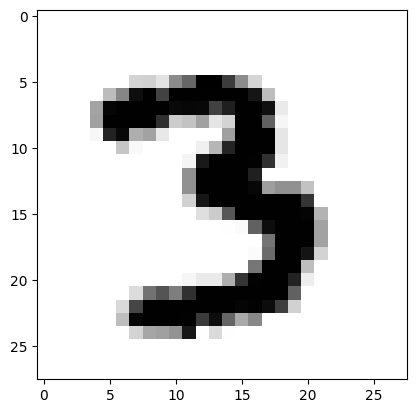

Predicted output: 3


In [ ]:
test_inp = x_test[500]
plt.imshow(test_inp.reshape(28, 28), cmap="binary")
plt.show()
test_inp_tensor = torch.tensor(test_inp, dtype=torch.float32).unsqueeze(0)
model.eval()
with torch.no_grad():
    pred = model(test_inp_tensor)

predicted_val = torch.argmax(pred, dim=1).item()
print(f"Predicted output: {predicted_val}")



# 4-р хэсэг
# Сургасан загварт дүн шинжилгээ хийх туслах [параметрүүдийг тохируулах](https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html)

In [ ]:
# Hyperparameter tuning implementation

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

# iterate over test data
for inputs, labels in testloader:
        output = net(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction

        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')